# Pymaceuticals Inc.
---

### Analysis
# Capomulin and Ramicane were the most effective drugs, demonstrating significantly smaller tumor volumes compared to the other treatments. Ketapril, on the other hand, was the least effective, resulting in larger tumor growth. Weight was a strong predictor of tumor size, with heavier mice consistently exhibiting larger tumors. This suggests that weight may play a role in tumor development and progression.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = mouse_study["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice = duplicate_mice["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = mouse_study[mouse_study["Mouse ID"].isin(duplicate_mice)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[~mouse_study["Mouse ID"].isin(duplicate_mice)]
clean_mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_mouse_study["Mouse ID"].nunique()
clean_mice_count


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_stats = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_volume_stats = tumor_volume_stats.rename(columns={"mean":"Mean Tumor Volume", "median":"Median Tumor Volume", "var":"Tumor Volume Variance", "std":"Tumor Volume Std. Dev.", "sem":"Tumor Volume Std. Err."})
tumor_volume_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_stats_agg = clean_mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
tumor_volume_stats_agg.columns = tumor_volume_stats_agg.columns.droplevel()
tumor_volume_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

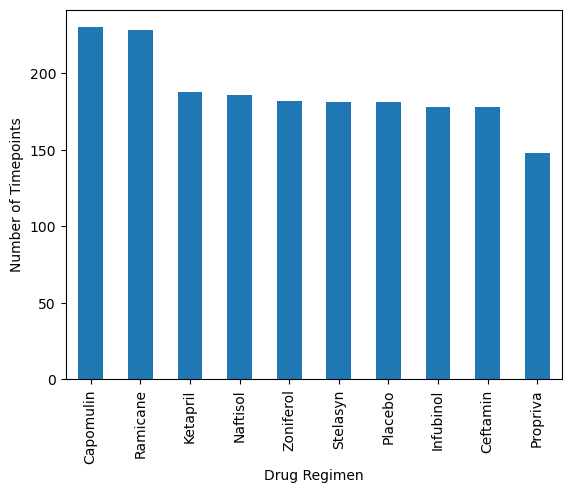

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_mouse_study["Drug Regimen"].value_counts()
drug_regimen_counts.plot(kind="bar")
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.show()


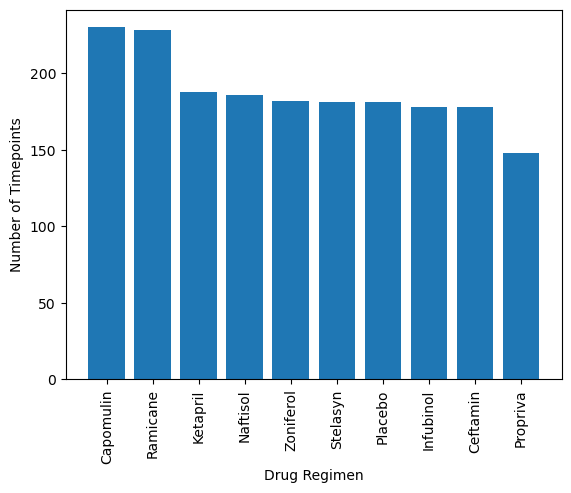

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_mouse_study["Drug Regimen"].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()


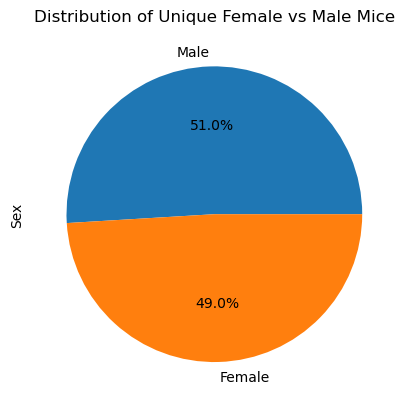

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
pie_chart_data = clean_mouse_study["Sex"].value_counts()

# Make the pie chart
pie_chart_data.plot(kind="pie", autopct='%1.1f%%')
plt.ylabel("Sex")
plt.title("Distribution of Unique Female vs Male Mice")
plt.show()


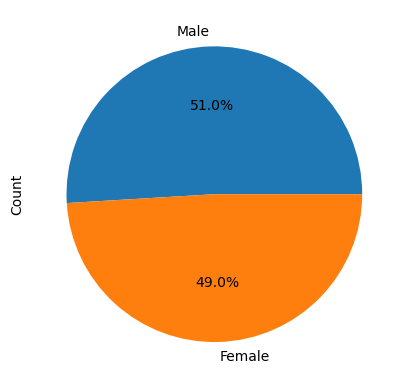

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.pie(pie_chart_data, labels=pie_chart_data.index, autopct='%1.1f%%')

# Get the unique mice with their gender
unique_mice = clean_mouse_study.drop_duplicates(subset="Mouse ID")
unique_mice = unique_mice[["Mouse ID", "Sex"]]
unique_mice = unique_mice.set_index("Mouse ID")


# Make the pie chart
plt.ylabel("Count")
plt.show()  




## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treament_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = clean_mouse_study[clean_mouse_study["Drug Regimen"].isin(treament_regimens)]
final_tumor_volume = final_tumor_volume.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
final_tumor_volume = final_tumor_volume.reset_index()




# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_study.groupby("Mouse ID")["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_mouse_study, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume = final_tumor_volume[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_volume = final_tumor_volume.set_index("Mouse ID")
final_tumor_volume = final_tumor_volume.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume"})
final_tumor_volume.head()


,Drug Regimen,Final Tumor Volume
Mouse ID,,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a262,Placebo,70.717621
a275,Ceftamin,62.999356
a366,Stelasyn,63.440686


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:


    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Final Tumor Volume"]
    tumor_vol_data.append(tumor_vol)



    # add subset
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq



    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")
    


Capomulin potential outliers: Series([], Name: Final Tumor Volume, dtype: float64)
Ramicane potential outliers: Series([], Name: Final Tumor Volume, dtype: float64)
Infubinol potential outliers: Mouse ID
c326    36.321346
Name: Final Tumor Volume, dtype: float64
Ceftamin potential outliers: Series([], Name: Final Tumor Volume, dtype: float64)


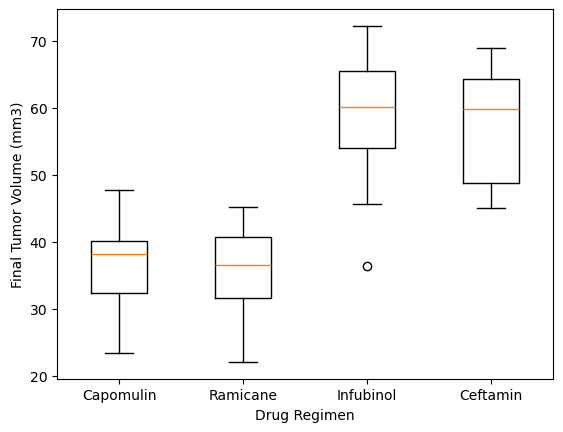

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, tick_labels=treatments)

plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()



## Line and Scatter Plots

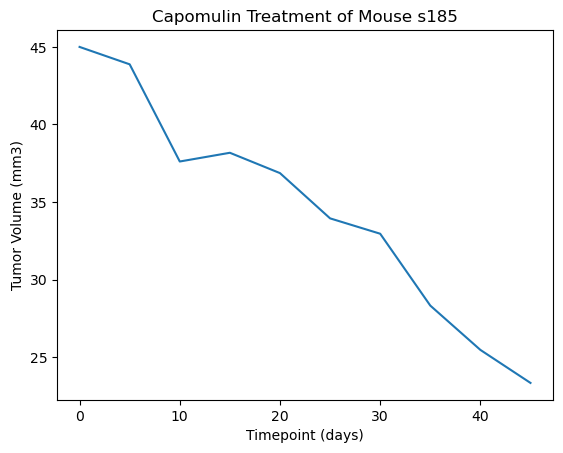

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_mouse_study[clean_mouse_study["Drug Regimen"] == "Capomulin"]
capomulin_data = capomulin_data[capomulin_data["Mouse ID"] == "s185"]
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin Treatment of Mouse s185")
plt.show()


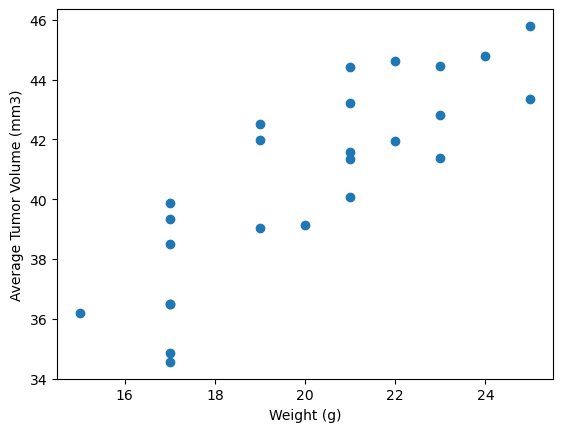

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse_study[clean_mouse_study["Drug Regimen"] == "Capomulin"]
capomulin_data = capomulin_data.groupby("Mouse ID").agg({"Weight (g)":"mean", "Tumor Volume (mm3)":"mean"})
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


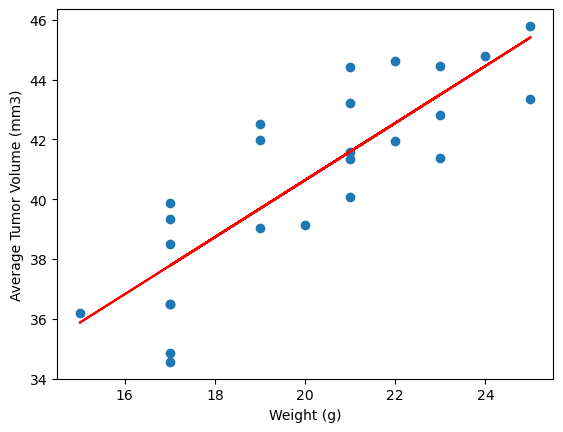

In [18]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation = st.pearsonr(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])

# Create a scatter plot
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"], label='Data Points')

# Plot the regression line
regression_line = slope * capomulin_data["Weight (g)"] + intercept
plt.plot(capomulin_data["Weight (g)"], regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

